In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

%%time
from sklearn.neighbors import NearestNeighbors

UsageError: Line magic function `%%time` not found.


In [10]:
empresa1 = pd.read_csv('data/estaticos_portfolio1.csv', index_col=0)
empresa2 = pd.read_csv('data/estaticos_portfolio2.csv', index_col=0)
empresa3 = pd.read_csv('data/estaticos_portfolio3.csv', index_col=0)

In [11]:
mercado = pd.read_csv('data/simplificado.csv', index_col=0)

In [12]:
mercado.shape

(462298, 22)

In [13]:
mercado.columns

Index(['id', 'fl_matriz', 'sg_uf', 'natureza_juridica_macro', 'setor',
       'idade_empresa_anos', 'fl_sa', 'fl_mei', 'fl_email', 'fl_telefone',
       'fl_rm', 'fl_veiculo', 'fl_optante_simples',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'fl_optante_simei', 'sg_uf_matriz', 'fl_passivel_iss',
       'vl_faturamento_estimado_aux', 'vl_faturamento_estimado_grupo_aux',
       'qt_filiais', 'de_nivel_atividade_numerico'],
      dtype='object')

In [14]:
empresa1.shape

(555, 181)

In [15]:
empresa2.shape

(566, 1)

In [16]:
empresa3.shape

(265, 1)

In [17]:
mercado.head().T

,0,1,2,3,4
id,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...
fl_matriz,1,1,1,1,1
sg_uf,RN,PI,AM,AM,RN
natureza_juridica_macro,ENTIDADES EMPRESARIAIS,OUTROS,OUTROS,OUTROS,OUTROS
setor,CONSTRUÇÃO CIVIL,SERVIÇO,SERVIÇO,SERVIÇO,SERVIÇO
idade_empresa_anos,14.4575,1.46301,7.09315,6.51233,3.2
fl_sa,0,0,0,0,0
fl_mei,0,1,1,0,0
fl_email,1,1,0,1,1
fl_telefone,1,1,1,1,1


In [19]:
variaveis_categoricas = ['sg_uf', 'natureza_juridica_macro', 'setor', 'sg_uf_matriz']
mercado_dummies = pd.get_dummies(mercado[variaveis_categoricas])

In [20]:
mercado_dummies.shape

(462298, 46)

In [21]:
mercado_dummies.head()

,sg_uf_AC,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,natureza_juridica_macro_ADMINISTRACAO PUBLICA,natureza_juridica_macro_CARGO POLITICO,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,0,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
mercado.drop(columns=variaveis_categoricas, inplace=True)

In [23]:
mercado = mercado.merge(mercado_dummies, left_index=True, right_index=True)

In [24]:
mercado.shape

(462298, 64)

In [25]:
mercado.head()

,id,fl_matriz,idade_empresa_anos,fl_sa,fl_mei,fl_email,fl_telefone,fl_rm,fl_veiculo,fl_optante_simples,...,sg_uf_matriz_PR,sg_uf_matriz_RJ,sg_uf_matriz_RN,sg_uf_matriz_RO,sg_uf_matriz_RR,sg_uf_matriz_RS,sg_uf_matriz_SC,sg_uf_matriz_SE,sg_uf_matriz_SP,sg_uf_matriz_TO
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,14.457534,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,1.463014,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,7.093151,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,6.512329,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,3.200000,0,0,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [26]:
empresa1_ajustada = empresa1.copy()
empresa1_ajustada['Cliente'] = int(1)
empresa1_ajustada = empresa1_ajustada[['id','Cliente']]

In [27]:
empresa1_ajustada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 554
Data columns (total 2 columns):
id         555 non-null object
Cliente    555 non-null int64
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [30]:
cliente_empresa1 = pd.merge(mercado, empresa1_ajustada, on='id', how='right')

In [31]:
cliente_empresa1.shape

(555, 65)

In [15]:
cliente_empresa1 = pd.merge(mercado, empresa1_ajustada, on='id', how='outer')

In [16]:
cliente_empresa1['Cliente'] = cliente_empresa1['Cliente'].fillna(0).astype(int)

In [17]:
cliente_empresa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462298 entries, 0 to 462297
Data columns (total 75 columns):
id                                                        462298 non-null object
fl_matriz                                                 462298 non-null bool
idade_empresa_anos                                        462298 non-null float64
fl_me                                                     462298 non-null bool
fl_sa                                                     462298 non-null bool
fl_epp                                                    462298 non-null bool
fl_mei                                                    462298 non-null bool
fl_ltda                                                   462298 non-null bool
fl_st_especial                                            462298 non-null bool
fl_email                                                  462298 non-null bool
fl_telefone                                               462298 non-null bool
fl_rm          

In [18]:
cliente_empresa1.shape

(462298, 75)

In [19]:
X = cliente_empresa1.drop(['id','Cliente'], axis = 1)

In [20]:
y = cliente_empresa1['Cliente']

In [21]:
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size = 0.7)

In [22]:
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((323608, 73), (138690, 73), (323608,), (138690,))

In [23]:
selector = SelectKBest(score_func=f_classif, k = 20)

In [24]:
Xtrain2 = selector.fit_transform(Xtrain, ytrain)

/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [25]:
Xval2 = selector.transform(Xval)

In [26]:
modelo = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)

In [27]:
modelo.fit(Xtrain2, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [28]:
previsao = modelo.predict(Xval2)

In [29]:
score = mean_absolute_error(yval, previsao)

In [30]:
k = 20

In [31]:
print( "K = {} - MAE = {}", k, score)

K = {} - MAE = {} 20 0.0024152755597068344


In [32]:
K_vs_Score = []
for k in range(2, Xtrain.shape[1], 2):
    selector = SelectKBest(score_func=f_classif, k = k)
    Xtrain2 = selector.fit_transform(Xtrain, ytrain)
    Xval2 = selector.transform(Xval)
    modelo = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 42)
    modelo.fit(Xtrain2, ytrain)
    previsao = modelo.predict(Xval2)
    score = mean_absolute_error(yval, previsao)
    print( "K = {} - MAE = {}", k, score)
    K_vs_Score.append(score)

/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 2 0.00241103413752241


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 4 0.0024129394845745855


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 6 0.002414577846863766


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 8 0.0024141401229599503


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 10 0.002413003354368984


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 12 0.002412458567435863


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 14 0.00241302630402565


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 16 0.002413027439382284


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 18 0.0024131178162752082


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 20 0.0024152755597068344


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 22 0.0024371670264516417


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 24 0.002435868418632771


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 26 0.0024361539020126798


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 28 0.0024355529162246184


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 30 0.0024933997770185206


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 32 0.0025705376683517397


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 34 0.0025700204852604834


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 36 0.0025906405034067767


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 38 0.002575807052358974


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 40 0.0025755568258910514


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 42 0.002579324635380254


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 44 0.002575067012101846


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 46 0.00257610788893941


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 48 0.0025750863588954146


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 50 0.002572388760870107


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 52 0.0025442019948237263


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 54 0.002533775287555141


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 56 0.002534548431260364


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 58 0.0025337746218666115


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 60 0.002559792897619907


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 62 0.0025615300991786525


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 64 0.0025965787559233374


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 66 0.00260045637880918


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 68 0.0026121589524790915


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 70 0.002602070706110291


/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


K = {} - MAE = {} 72 0.0026009148925437054


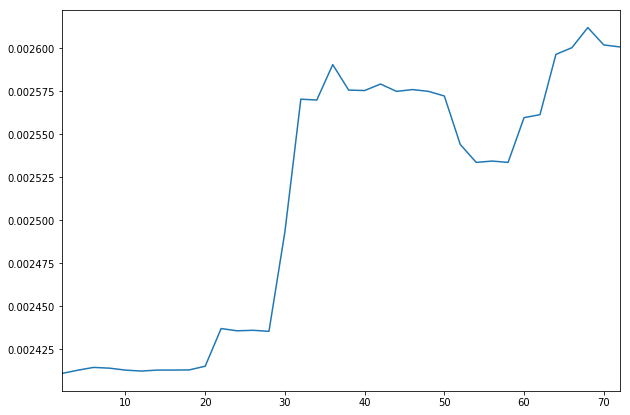

In [34]:
pd.Series(K_vs_Score, index= range(2, Xtrain.shape[1], 2)).plot(figsize=(10,7));

In [35]:
selector = SelectKBest(k=20, score_func=f_classif)

In [36]:
selector.fit(Xtrain, ytrain)

/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [4] are constant.
  UserWarning)
/home/eduardo/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=20, score_func=<function f_classif at 0x7ff8fab870d0>)

In [37]:
mask = selector.get_support()

In [38]:
type(Xval)

pandas.core.frame.DataFrame

In [39]:
Xval.columns[mask]

Index(['fl_mei', 'fl_rm', 'fl_optante_simples', 'fl_optante_simei',
       'fl_passivel_iss', 'qt_filiais',
       'natureza_juridica_macro_ADMINISTRACAO PUBLICA',
       'natureza_juridica_macro_ENTIDADES EMPRESARIAIS',
       'natureza_juridica_macro_ENTIDADES SEM FINS LUCRATIVOS',
       'natureza_juridica_macro_OUTROS', 'setor_AGROPECUARIA',
       'setor_COMERCIO', 'setor_CONSTRUÇÃO CIVIL', 'setor_INDUSTRIA',
       'setor_SERVIÇO', 'setor_SETOR INDEFINIDO', 'sg_uf_matriz_PI',
       'sg_uf_matriz_SP', 'de_nivel_atividade_ALTA',
       'de_nivel_atividade_BAIXA'],
      dtype='object')